# Fine-tune the latest YOLOv8 model

In [1]:
import os
from ultralytics import YOLO
from roboflow import Roboflow
from IPython.display import Image, display
from PIL import Image as PILImage
import matplotlib.pyplot as plt
import subprocess
from dotenv import load_dotenv
import glob


### Make sure ultralytics has the version 8.0.196 as the latest version may not work as expected for the time this project has been created

In [2]:
import ultralytics
print(ultralytics.__version__)


8.0.196


## Using original YOLOv8 for testing

In [3]:
model_path = os.path.join('yolov8n.pt')
predict_image_url = 'https://media.roboflow.com/notebooks/examples/dog.jpeg'
saved_image_path = 'runs/detect/predict/dog.jpeg'  # Default YOLOv8 path


In [4]:
result = subprocess.run([
    'yolo', 'task=detect', 'mode=predict', f'model={model_path}', 
    f'conf=0.25', f'source={predict_image_url}', 'save=True'
], capture_output=True, text=True)

if os.path.exists(saved_image_path):
    image = PILImage.open(saved_image_path)
    image.show()

In [5]:
model = YOLO(model_path)
results = model.predict(source=predict_image_url, conf=0.25)
print(results[0].boxes.xyxy)
print(results[0].boxes.conf)
print(results[0].boxes.cls)

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 e:\AI Projects\Object-Detection---Yolov8\Customise m

tensor([[   0.0000,  314.4715,  625.0754, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]])
tensor([0.7271, 0.2907, 0.2846])
tensor([ 0., 16.,  2.])


# Creating own datasets from Roboflow

### Roboflow is a trending and easy-to-use platform to manage data 📊 for computer vision 🤖 projects. You may also create your own datasets if you prefer to.

### Create an account for free and enter the credentials

In [6]:
# Load environment variables from .env.local
load_dotenv('../.env.local')

# Retrieve credentials and project details from environment variables
api_key = os.getenv('ROBOFLOW_API_KEY')
workspace = os.getenv('ROBOFLOW_WORKSPACE')
project_name = os.getenv('ROBOFLOW_PROJECT')

# Initialize Roboflow and download dataset
rf = Roboflow(api_key=api_key)
project = rf.workspace(workspace).project(project_name)
dataset = project.version(4).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [7]:
command = f'yolo train data="{dataset.location}/data.yaml" model="yolov8s.pt" epochs=15 imgsz=640 batch=32 save=True'

# Execute the command and capture output
result = subprocess.run(command, shell=True, capture_output=True, text=True, encoding='utf-8')

# Print the command output and error (if any)
print("STDOUT:")
print(result.stdout)
print("STDERR:")
print(result.stderr)

STDOUT:

STDERR:
E:\AI Projects\Object-Detection---Yolov8\venv\lib\site-packages\ultralytics\nn\tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load

In [8]:
train_dir = 'runs/detect/train/'

# List all files and directories in the specified path
file_list = os.listdir(train_dir)

# Print the list of files and directories
for file_name in file_list:
    print(file_name)

args.yaml
confusion_matrix.png
confusion_matrix_normalized.png
F1_curve.png
labels.jpg
labels_correlogram.jpg
PR_curve.png
P_curve.png
results.csv
results.png
R_curve.png
train_batch0.jpg
train_batch1.jpg
train_batch100.jpg
train_batch101.jpg
train_batch102.jpg
train_batch2.jpg
val_batch0_labels.jpg
val_batch0_pred.jpg
weights


# Visualise performance of the trained model

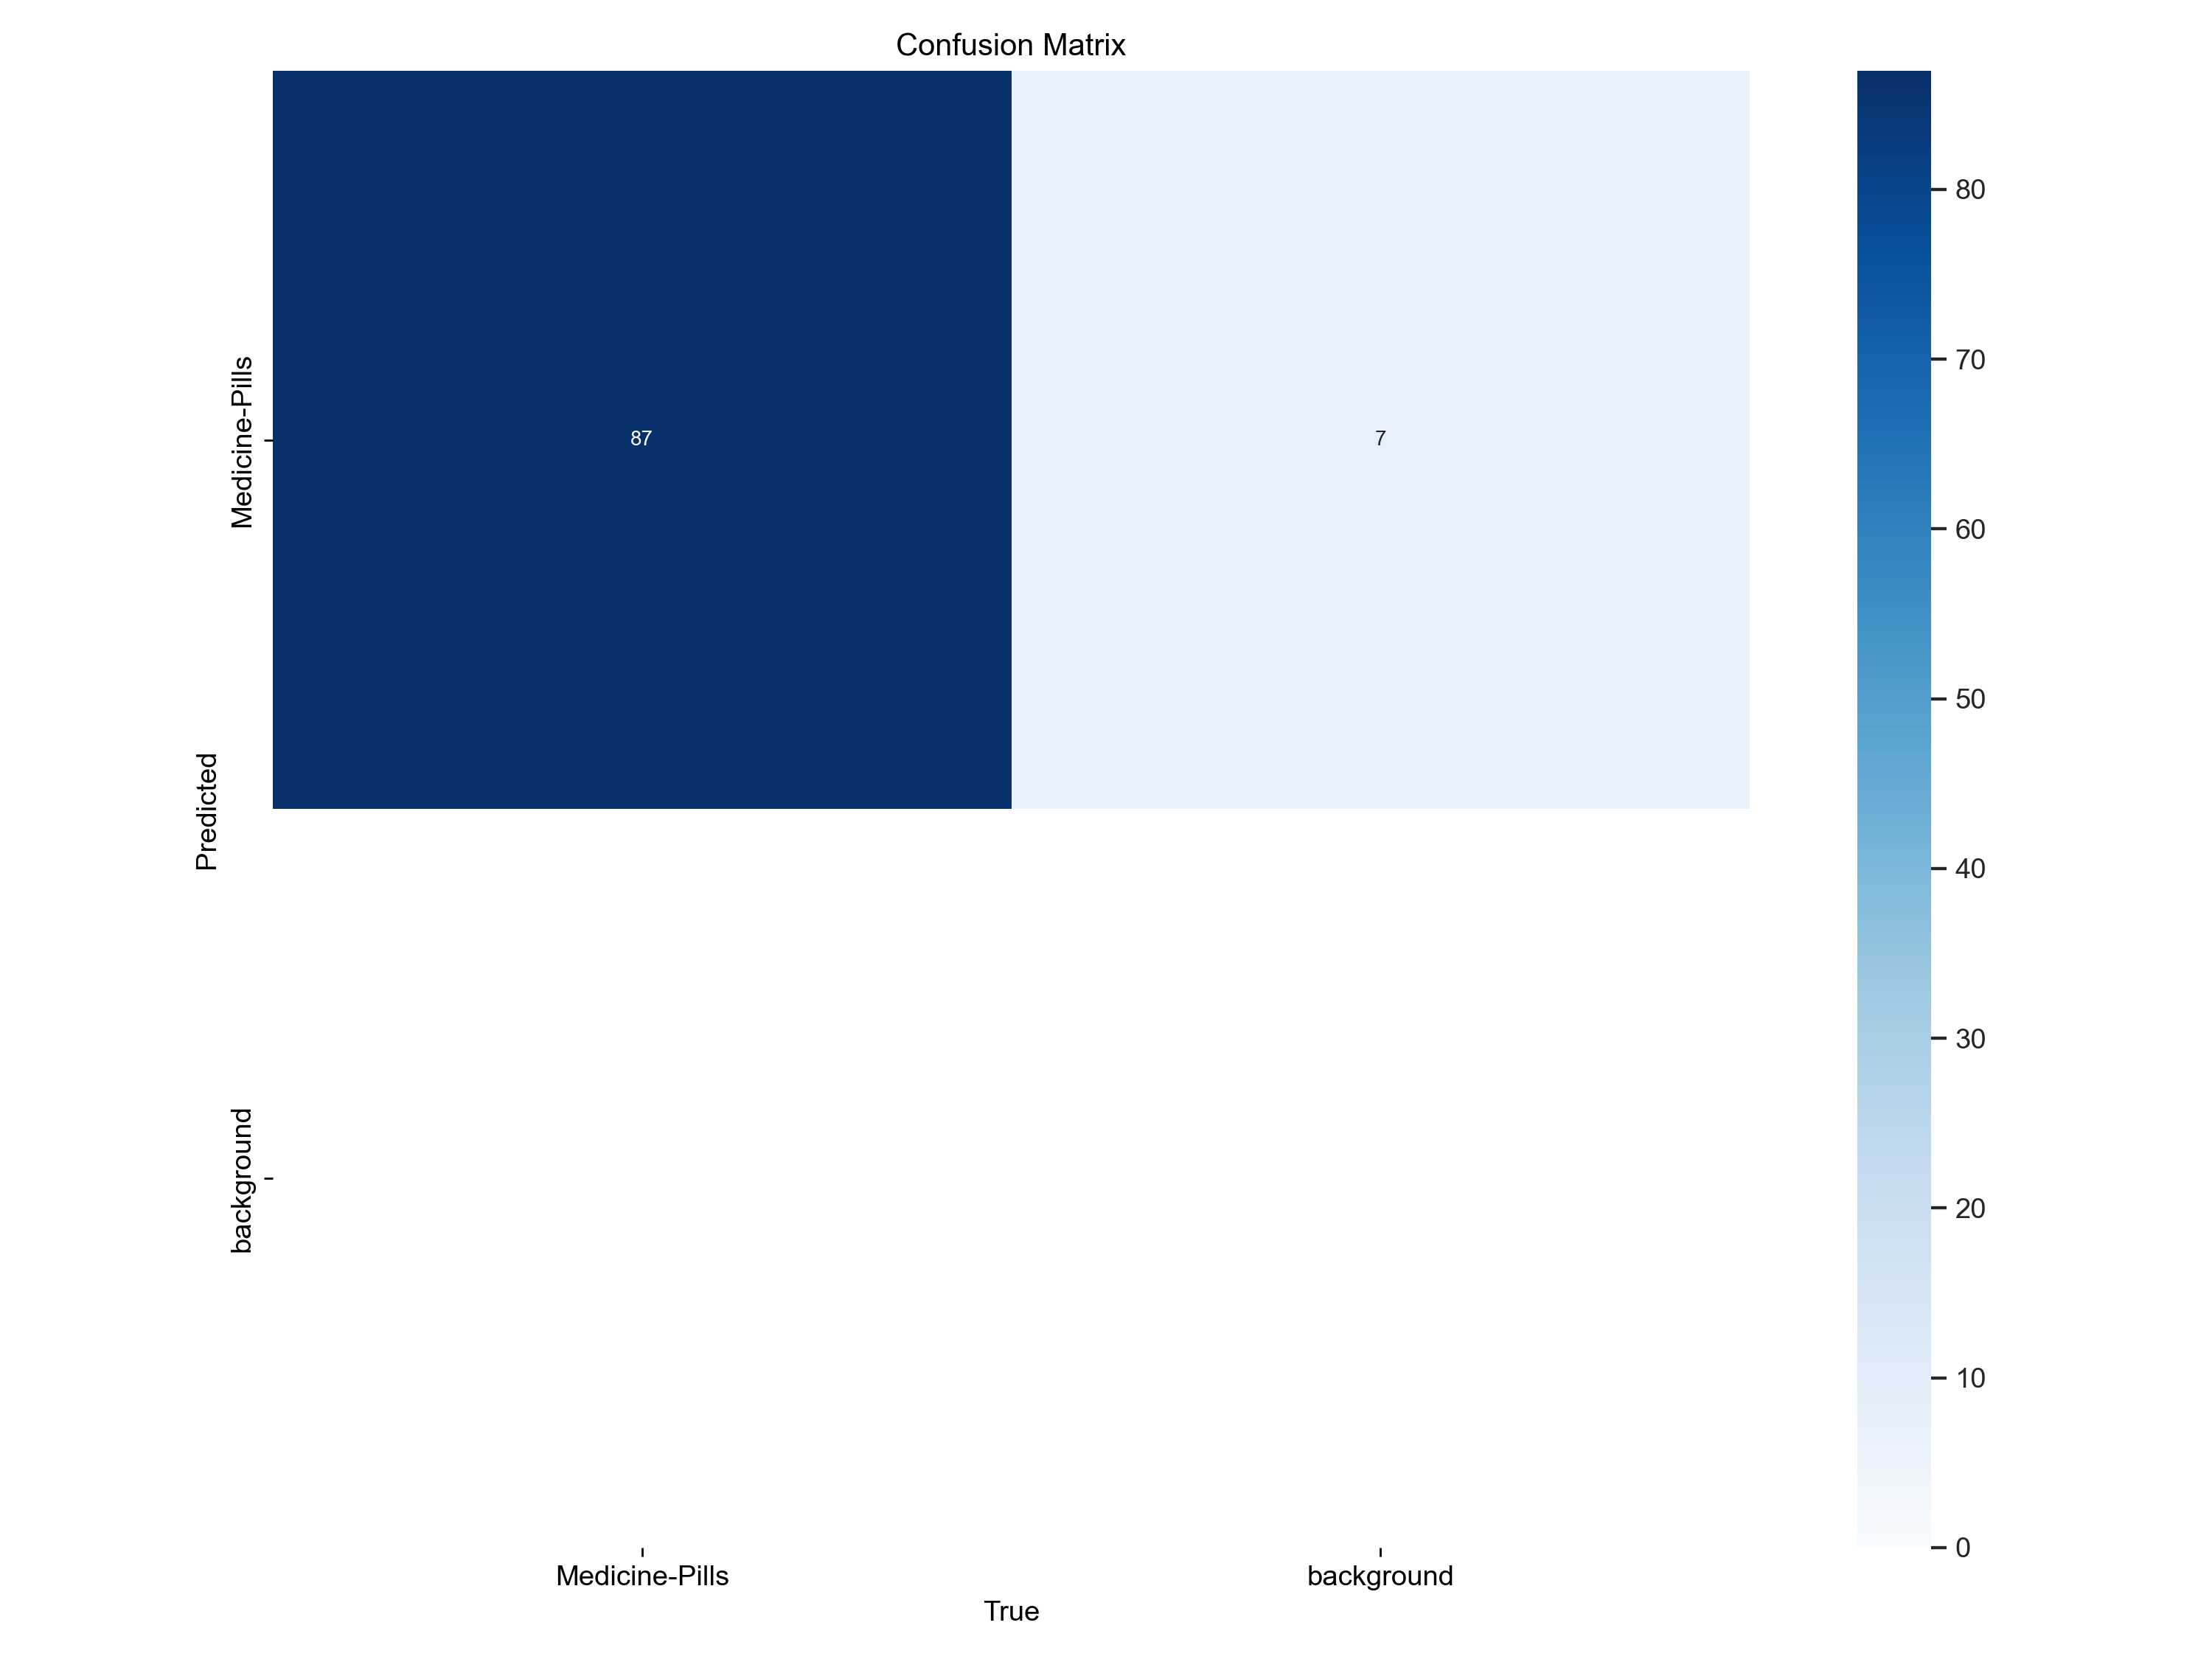

In [9]:

Image(filename=f'runs/detect/train/confusion_matrix.png', width=600)

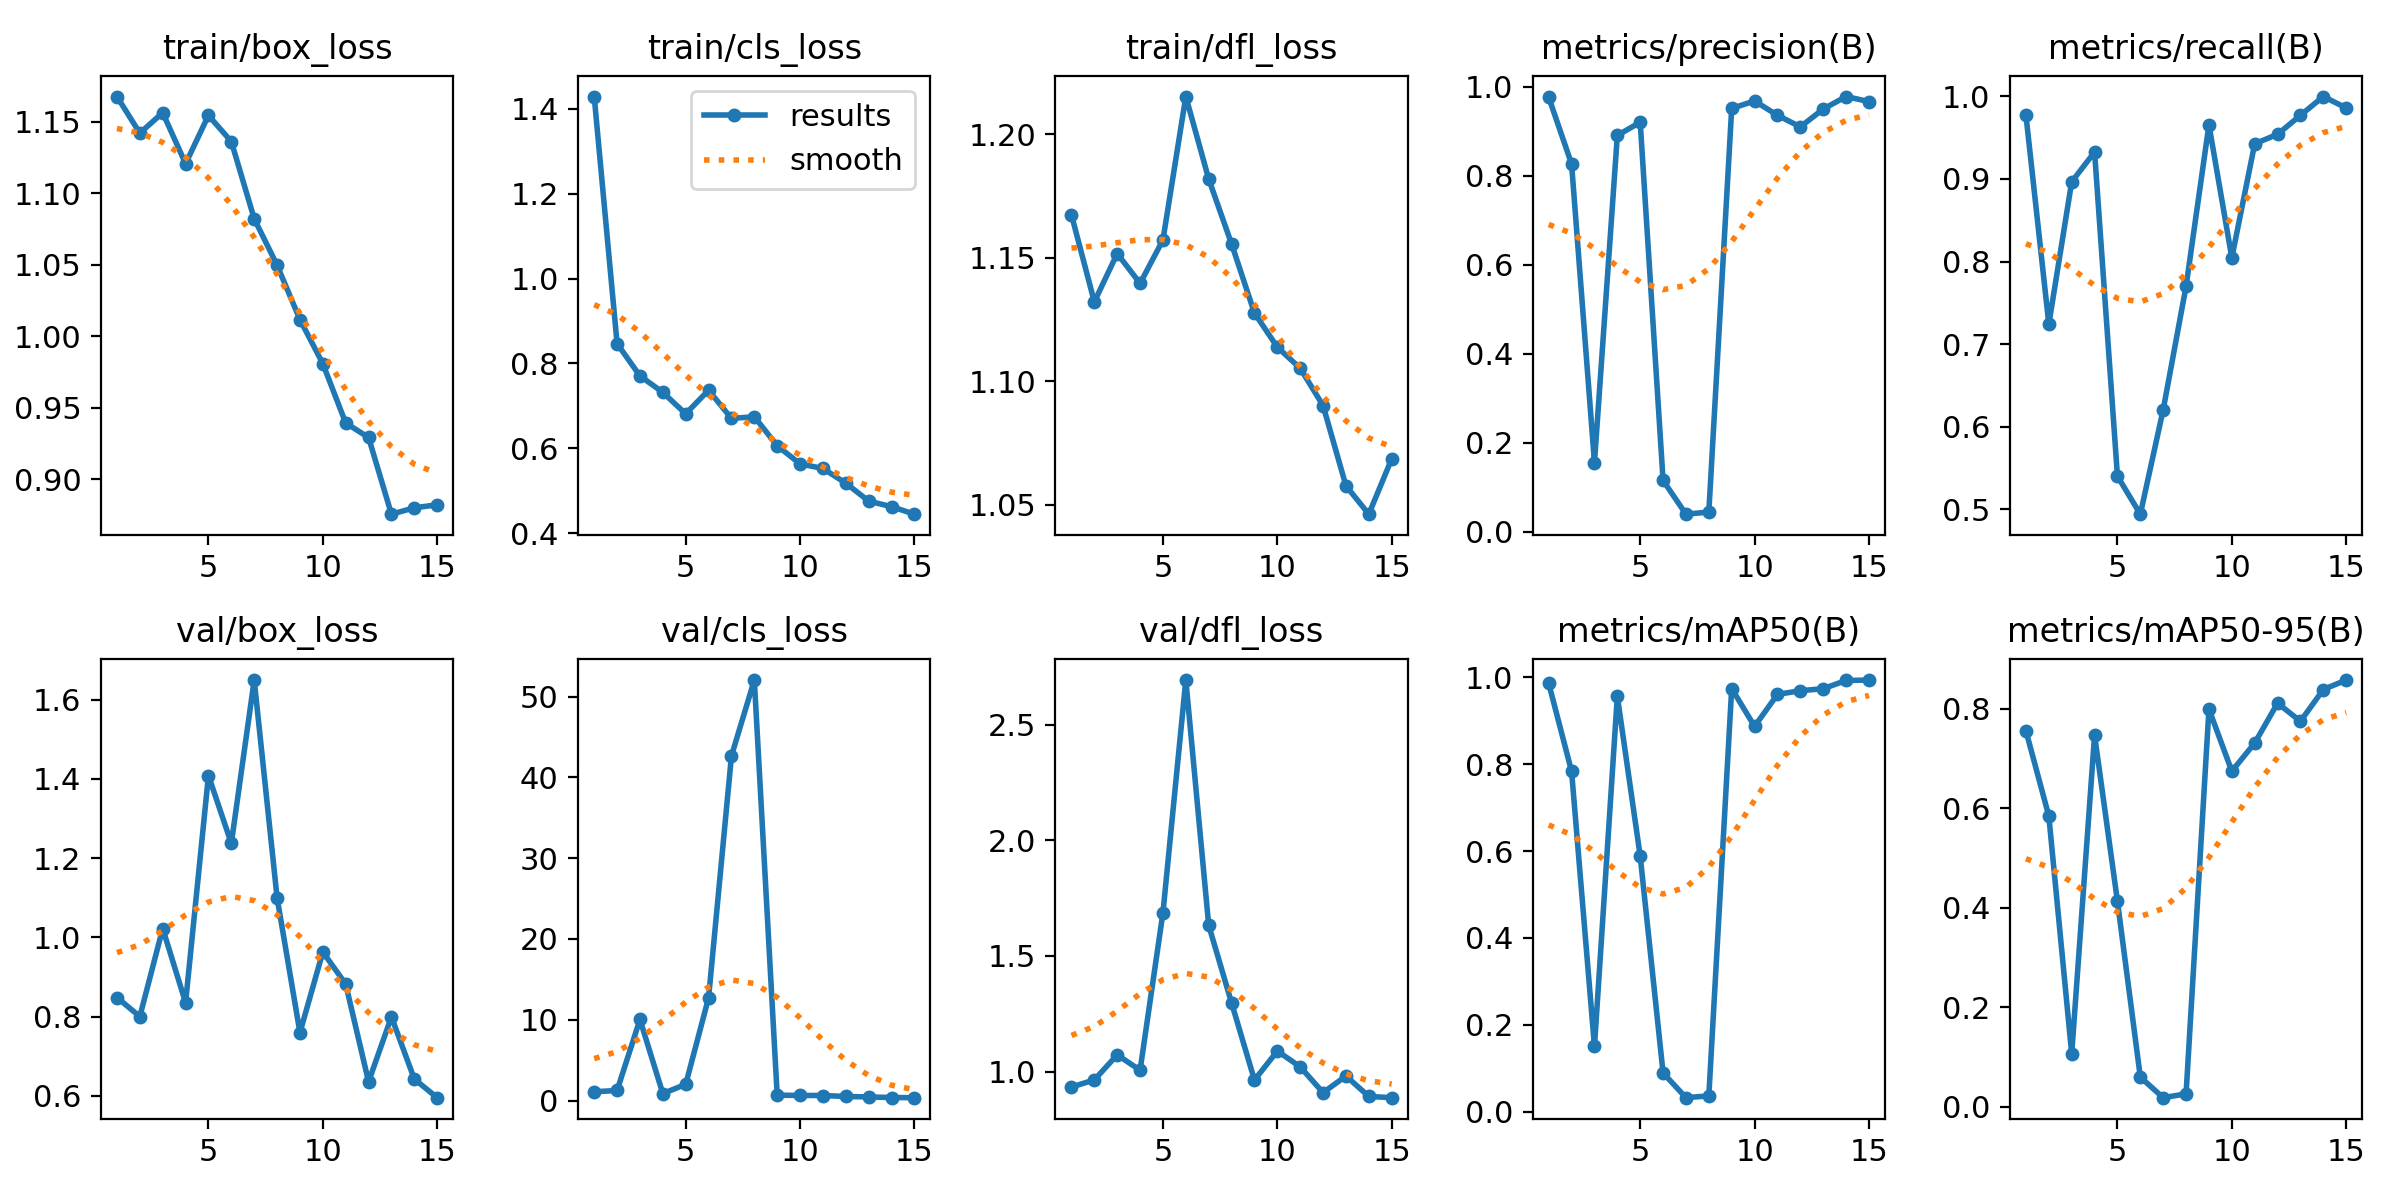

In [10]:

Image(filename=f'runs/detect/train/results.png', width=600)

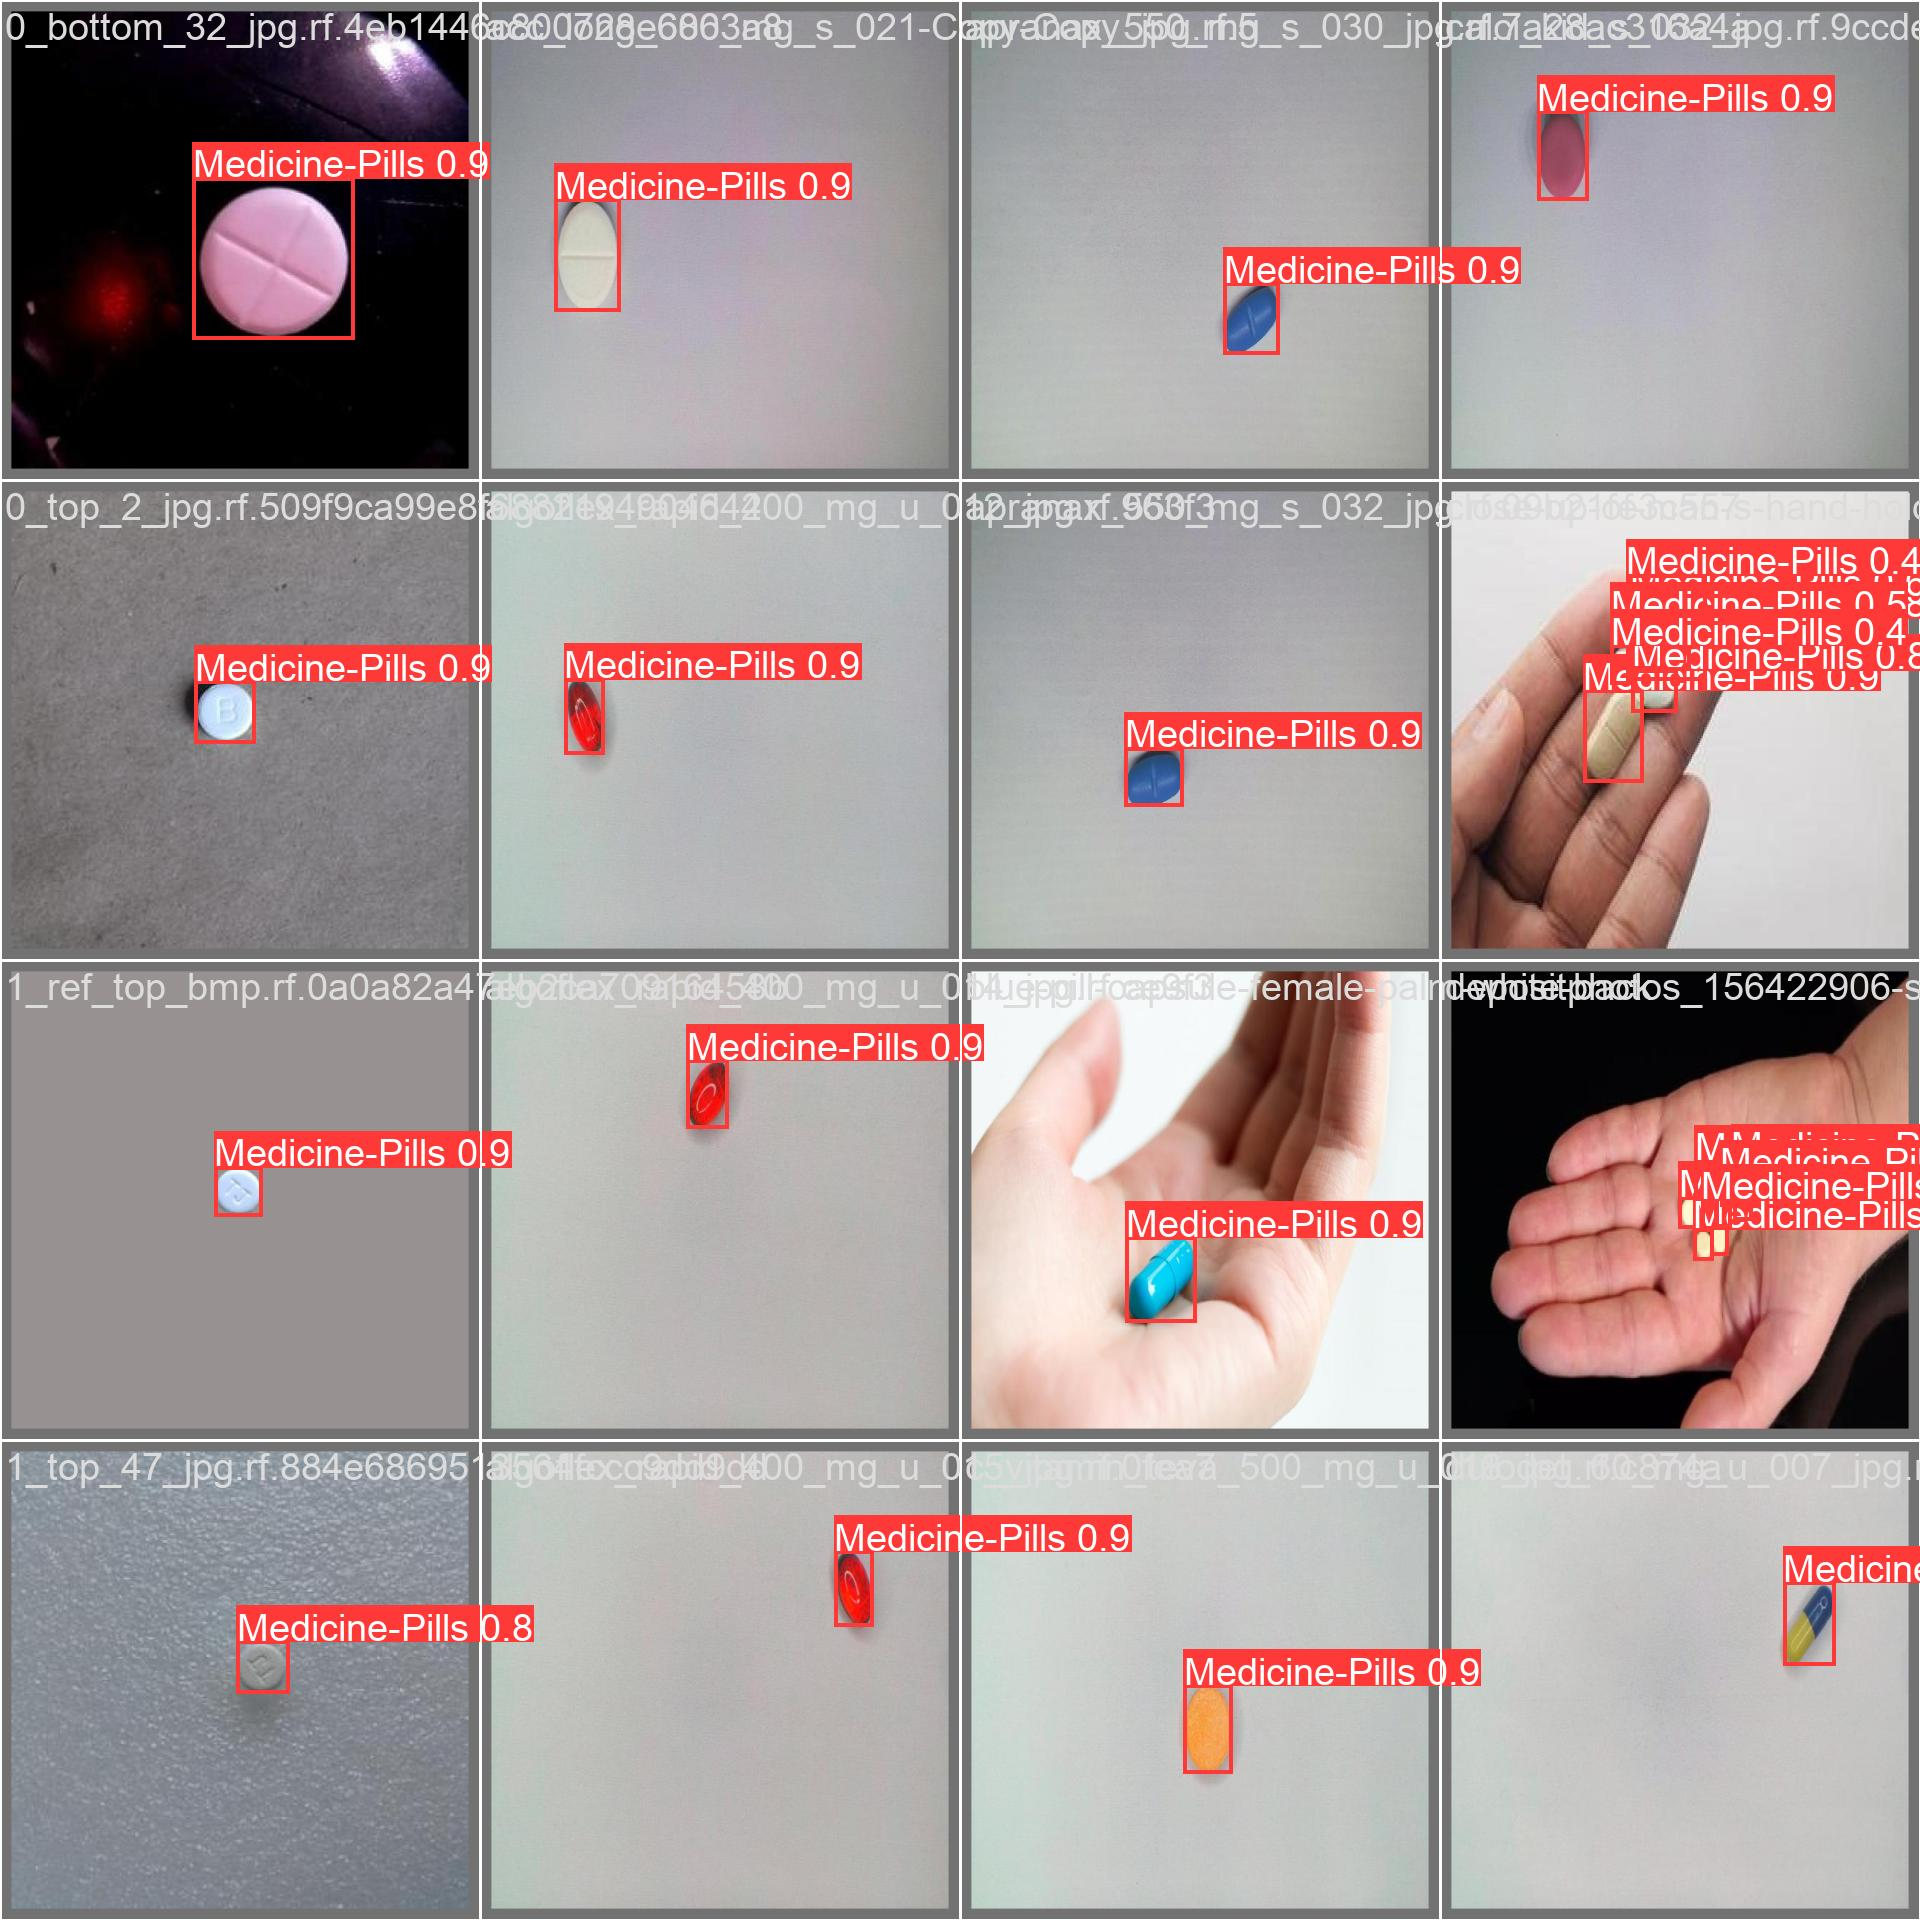

In [11]:

Image(filename=f'runs/detect/train/val_batch0_pred.jpg', width=600)

In [12]:
subprocess.run([
    'yolo', 'task=detect', 'mode=val', 
    f'model={train_dir}/weights/best.pt', 
    f'data={dataset.location}/data.yaml'
])

CompletedProcess(args=['yolo', 'task=detect', 'mode=val', 'model=runs/detect/train//weights/best.pt', 'data=e:\\AI Projects\\Object-Detection---Yolov8\\Customise model Folder\\Pills-Detection-4/data.yaml'], returncode=0)

In [13]:
subprocess.run([
    'yolo', 'task=detect', 'mode=predict', 
    f'model={train_dir}/weights/best.pt', 
    'conf=0.25', f'source={dataset.location}/test/images', 
    'save=True'
])

CompletedProcess(args=['yolo', 'task=detect', 'mode=predict', 'model=runs/detect/train//weights/best.pt', 'conf=0.25', 'source=e:\\AI Projects\\Object-Detection---Yolov8\\Customise model Folder\\Pills-Detection-4/test/images', 'save=True'], returncode=0)

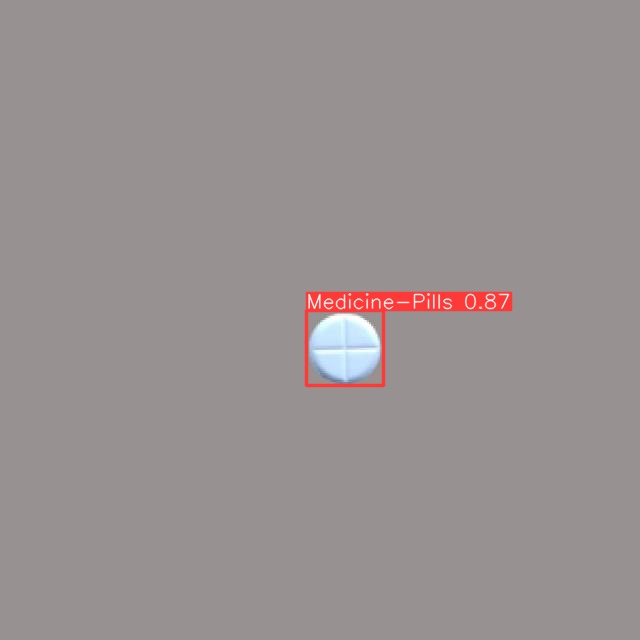

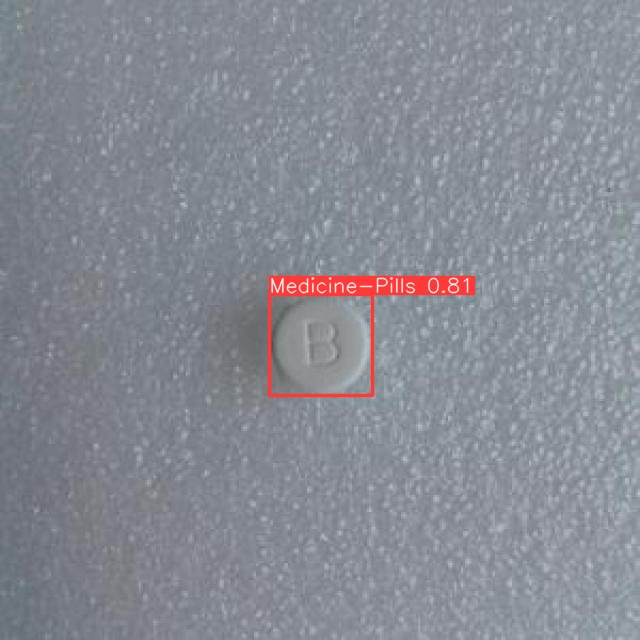

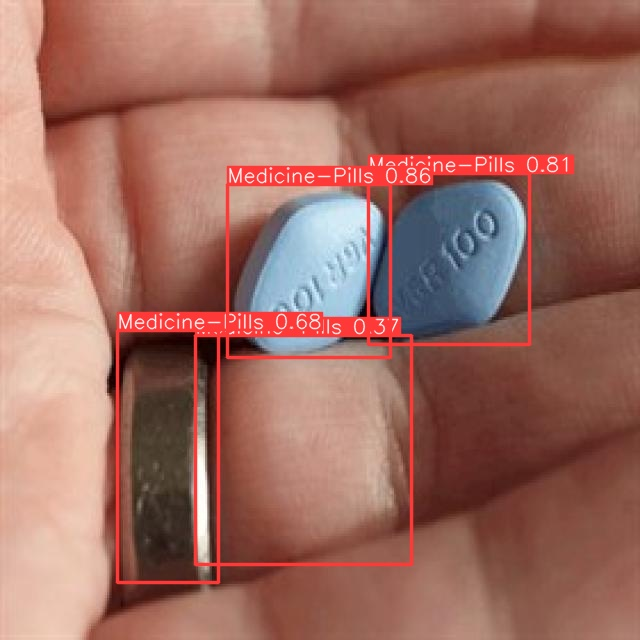

In [14]:
# Define the base path where the folders are located
base_path = 'runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=400))
    print("\n")

# Deploying it back to Roboflow.

##  You can find the trained model at runs/detect/train/weights/best.pt (Default path for YOLOv8)

In [15]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"runs/detect/train/")

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


View the status of your deployment at: https://app.roboflow.com/custom-object-detection-yolov8/pills-detection-or3yu/4
Share your model with the world at: https://universe.roboflow.com/custom-object-detection-yolov8/pills-detection-or3yu/model/4


In [29]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
# model = project.version(dataset.version).model

# #choose random test set image
# import os, random
# test_set_loc = dataset.location + "/test/images/"
# random_test_image = random.choice(os.listdir(test_set_loc))
# print("running inference on " + random_test_image)

# pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
# pred